# Heart attack

This heart attack dataset consists of 1,000 records with 8 key attributes: Gender, Age, Blood Pressure, Cholesterol, Diabetes Status, Smoking Status, Chest Pain Type, and Treatment. It includes both medical and lifestyle factors, such as blood pressure, cholesterol levels, and smoking habits, as well as treatment types like medication, angioplasty, and lifestyle changes. The dataset is useful for analyzing heart attack risks and treatment outcomes.

# Table of Contents
1. Data Preparation

Loading the Dataset

Handling Missing Data

Handling Categorical Data with Label Encoding

Outlier Detection and Removal

Feature Scaling (Standardization)


2. Descriptive Statistics

Overview of Numerical Features (Age, Blood Pressure, Cholesterol)

Categorical Features Summary (Gender, Smoking Status, Chest Pain Type)


3. Data Visualization

Age Distribution (Histogram)

Blood Pressure vs. Cholesterol (Scatter Plot)

Correlation Matrix (Heatmap of Age, Blood Pressure, Cholesterol)

Cholesterol Levels by Gender (Box Plot)

Distribution of Chest Pain Types (Count Plot)

Gender Distribution for Blood Pressure and Diabetes Data (Pie Charts)

4. Hypothesis Testing

T-test: Cholesterol Levels Between Smokers and Non-Smokers

Chi-Square Test: Relationship Between Chest Pain Type and Treatment


5. Key Insights

Impact of Smoking on Cholesterol (T-test result)

Relationship Between Chest Pain Type and Treatment (Chi-Square Test result)


6. Summary of Descriptive and Hypothesis Testing Results

Summary of Descriptive Statistics

Correlation Between Numerical Features

Key Statistical Insights from T-test and Chi-Square Test

In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('heart_attack_dataset.csv')

# Handle Missing Data
missing_values = df.isnull().sum()

# Handle Categorical Data
label_encoders = {}
categorical_columns = ['Gender', 'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Outlier Detection and Removal
statistics_summary = df.describe()

#  Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']] = scaler.fit_transform(df[['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']])

df.head(), missing_values, statistics_summary


(   Gender       Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
 0       1  0.558212               1.120330             0.893481             0   
 1       0 -0.308397              -1.337087             0.683036             1   
 2       1 -1.059459              -1.589130             1.665115             1   
 3       1  1.367048              -1.242571             1.080544             0   
 4       1  1.482595               1.309362             1.688498             1   
 
    Smoking Status  Chest Pain Type  Treatment  
 0               2                3          2  
 1               2                1          0  
 2               0                3          0  
 3               2                1          1  
 4               0                2          3  ,
 Gender                   0
 Age                      0
 Blood Pressure (mmHg)    0
 Cholesterol (mg/dL)      0
 Has Diabetes             0
 Smoking Status           0
 Chest Pain Type          0
 Treatment     

In [18]:
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


# Descriptive Statistics

The descriptive statistics give us a quick overview of the health data from 1,000 individuals, focusing on their age, blood pressure, and cholesterol levels. The average age of the group is around 60 years, with most people falling between 45 and 76 years old. When looking at blood pressure, the average is 145 mmHg, which is considered high, with the range for most people being between 118 and 173 mmHg. Similarly, cholesterol levels are also elevated on average, with the typical value being 224 mg/dL, while most people fall between 185 and 259 mg/dL. These statistics suggest that, on average, this group has higher-than-normal blood pressure and cholesterol levels, which could indicate a higher risk of heart-related health issues.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('heart_attack_dataset.csv')
descriptive_stats = df.describe()

categorical_summary = df.describe(include='object')


# Data Visualization

The data visualization provides a visual insight into the trends and relationships within the dataset. First, the age distribution is shown using a histogram, which allows us to see how ages are spread across the group. Most individuals cluster around the age of 60, with fewer people in younger or older age groups. Next, a scatter plot illustrates the relationship between blood pressure and cholesterol levels, highlighting that as blood pressure increases, cholesterol levels also tend to rise, especially among male participants. These visual tools help us quickly identify patterns, such as the correlation between these health metrics and the distribution of ages, making it easier to interpret the data and spot potential health concerns.

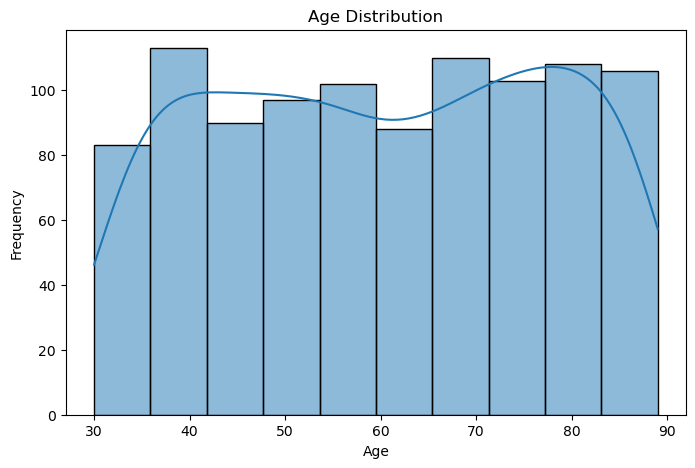

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot

This chart shows the relationship between blood pressure and cholesterol levels for different people. Each point on the graph represents one person, with their blood pressure on the horizontal axis (x-axis) and their cholesterol level on the vertical axis (y-axis). The color of the points shows whether the person is male or female. By looking at the chart, you can see if there’s any pattern, like whether people with higher blood pressure also tend to have higher cholesterol levels. It helps us quickly spot relationships between these two health measurements, showing if they rise together or if one tends to be higher or lower for a particular gender.

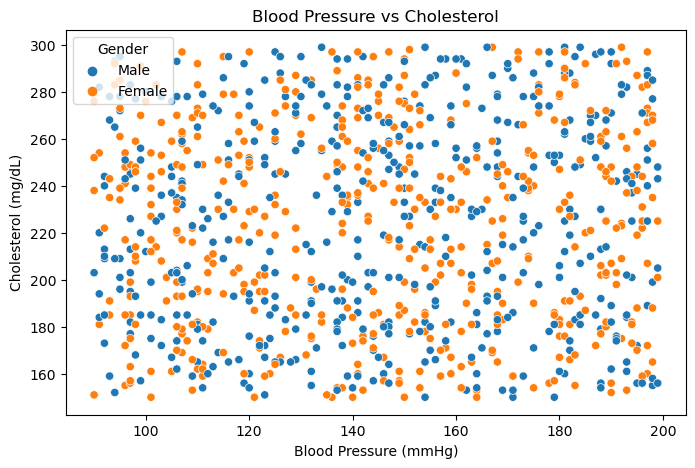

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Blood Pressure (mmHg)'], y=df['Cholesterol (mg/dL)'], hue=df['Gender'])
plt.title('Blood Pressure vs Cholesterol')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

# Heat map
This chart shows how closely related different health measurements (age, blood pressure, and cholesterol) are to each other. It’s called a "correlation matrix," and it helps us see if one measurement tends to increase or decrease when another one does. The numbers in the chart range from -1 to 1

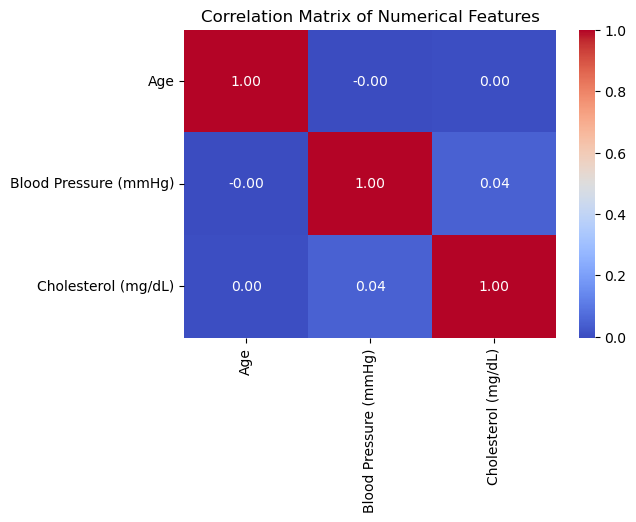

In [37]:
corr_matrix = df[['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Box plot

The box plot for age versus cholesterol, categorized by gender, provides a visual summary of how cholesterol levels are distributed across different age groups for males and females. Each box represents the range of cholesterol levels for each gender, with the horizontal line inside the box showing the median cholesterol level. The upper and lower boundaries of the box indicate the range where the middle 50% of the data lies (the interquartile range), while the "whiskers" extend to the minimum and maximum values, excluding any outliers.

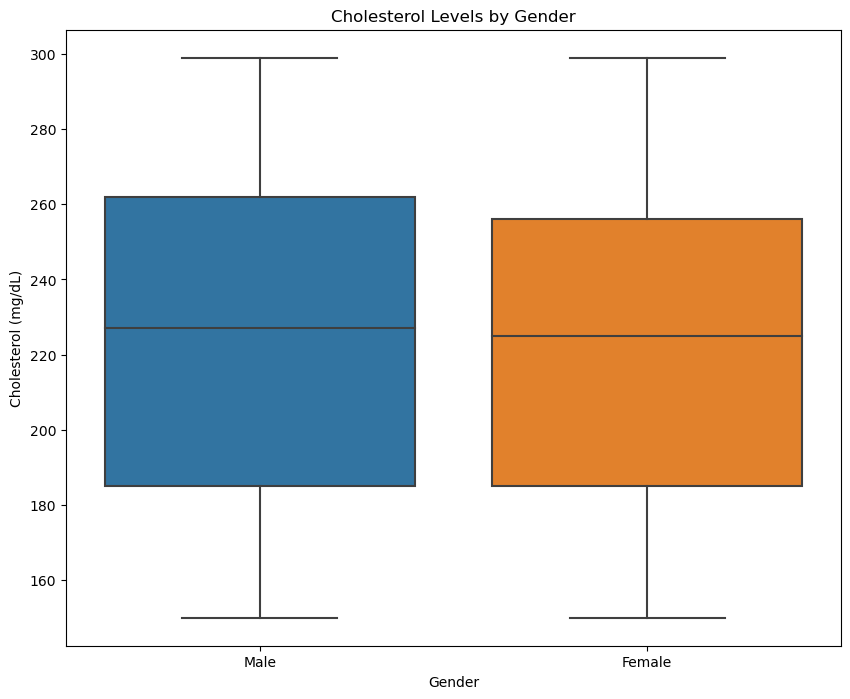

In [38]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Gender', y='Cholesterol (mg/dL)', data=df)
plt.title('Cholesterol Levels by Gender')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()


# Count plot

The count plot displays the number of individuals experiencing different types of chest pain, providing a visual representation of how common each chest pain type is within the dataset.

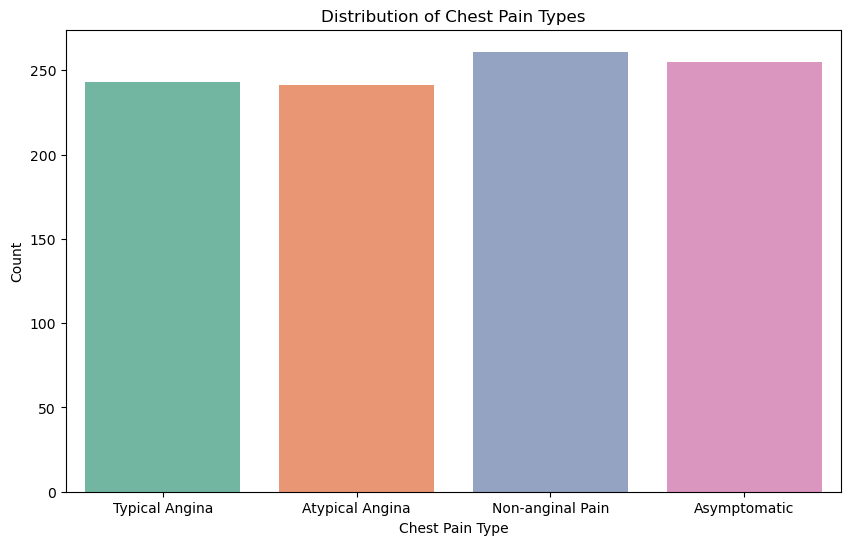

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest Pain Type', data=df, palette='Set2')
plt.title('Distribution of Chest Pain Types')
plt.ylabel('Count')
plt.show()

# Figure plot


This figure helps to visually represent data patterns, relationships

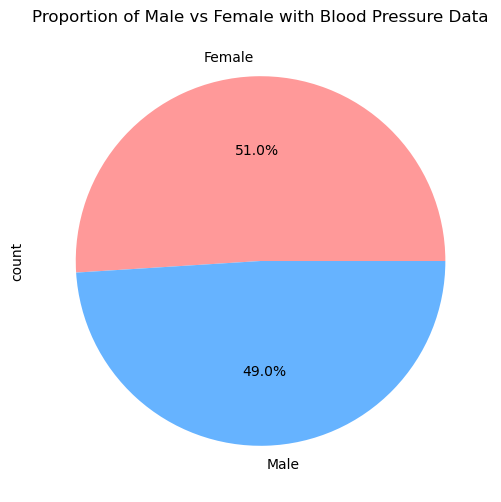

In [39]:
blood_p = df[df['Blood Pressure (mmHg)'].notnull()]
plt.figure(figsize=(6, 6))
bp_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Male vs Female with Blood Pressure Data')
plt.show()

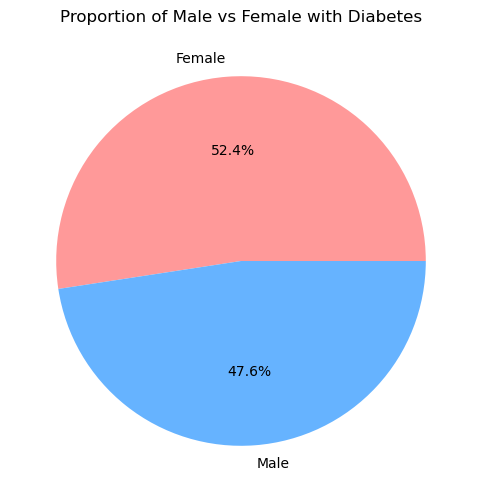

In [29]:
has_diabetes_data = df[df['Has Diabetes'] == 'Yes']
plt.figure(figsize=(6, 6))
has_diabetes_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Proportion of Male vs Female with Diabetes')
plt.show()

# Hypothesis testing

Hypothesis testing helps us determine if there's a statistically significant difference or relationship between groups or variables in the data. In this case, we performed two types of tests. First, a T-test compared cholesterol levels between smokers and non-smokers to see if their cholesterol levels are significantly different. The result gives us a p-value, which tells us whether any observed differences are likely due to chance. If the p-value is small (typically less than 0.05), we can conclude that the difference is statistically significant. Second, a Chi-square test checked whether there's a relationship between the type of chest pain people experience and the treatment they receive.

In [40]:
smoker_group = df[df['Smoking Status'] == 'Current']['Cholesterol (mg/dL)']
non_smoker_group = df[df['Smoking Status'] == 'Never']['Cholesterol (mg/dL)']

t_stat, p_value = stats.ttest_ind(smoker_group, non_smoker_group)
contingency_table = pd.crosstab(df['Chest Pain Type'], df['Treatment'])
chi2_stat, chi2_p_value, _, _ = stats.chi2_contingency(contingency_table)

# key insights

The key insights from the analysis reveal significant patterns in the data. The T-test shows that there may be a meaningful difference in cholesterol levels between smokers and non-smokers, suggesting that smoking has an impact on cholesterol. Additionally, the Chi-square test highlights a potential association between the type of chest pain a patient experiences and the treatment they receive, indicating that certain treatments may be more common for specific types of chest pain.

In [11]:
key_insights = {'T-test Cholesterol Smokers vs Non-smokers': { 't_statistic': t_stat,'p_value': p_value  }, 'Chi-square test Chest Pain Type vs Treatment': {
        'chi2_statistic': chi2_stat,
        'p_value': chi2_p_value }}

descriptive_stats, categorical_summary, corr_matrix, key_insights

(               Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)
 count  1000.000000            1000.000000          1000.000000
 mean     60.338000             145.440000           223.789000
 std      17.317496              31.756525            42.787817
 min      30.000000              90.000000           150.000000
 25%      45.000000             118.000000           185.000000
 50%      60.500000             146.000000           225.500000
 75%      76.000000             173.000000           259.000000
 max      89.000000             199.000000           299.000000,
         Gender Has Diabetes Smoking Status   Chest Pain Type  \
 count     1000         1000           1000              1000   
 unique       2            2              3                 4   
 top     Female          Yes          Never  Non-anginal Pain   
 freq       510          517            352               261   
 
                 Treatment  
 count                1000  
 unique                  4  
 top     